In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

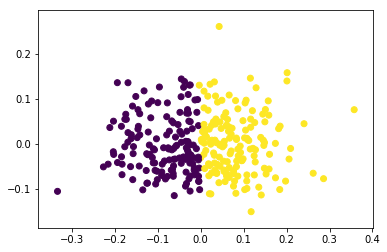

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99
138 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [7]:
%%timeit -n1 -r1
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [62]:
%%timeit -n1 -r1
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200,
    random_state=7)

minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0      148    0
1        1  154
24.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Really not sure what is wrong with the %%timeit magic function.  I have to run the first kmeans cell before adding the %%timeit to get the second cell to recognize that any of the variables have been initialized.

Also the second kminimeans is either perfectly accurate (almost) or perfectly inaccurate after each time the cell is run, setting the random_state to avoid this.

## Play around with changing K

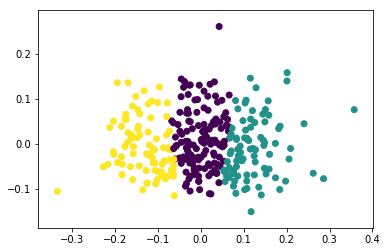

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      65  70
1      25  61
2      49  33
140 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [68]:
%%timeit -n1 -r1
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [70]:
%%timeit -n1 -r1
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=4,
    batch_size=200,
    random_state=7)

minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0   0   1
row_0        
0      63   0
1       9  49
2      77  26
3       0  79
27.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


The solution that I find the most compelling is the MiniBatchKmeans, with a random_state=7 where it is almost perfect.  I am not sure why I would want to increase the number of clusters for a binary case.  Would I be looking to see that they perfectly predict, or atleast come close to predicting, one of the binary values to determine whether or not that cluster is worth keeping?  For example if I went with the 4 clusters in the MiniBatchKmeans would cluster 0 and 2 be the ones that are predicting 'not heart disease' (with 2 not being that great) and then 1 and 3 predicting the 'heart disease'.